In [1]:
# RESULT: PASS. no bugs found.
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *


In [2]:
data = LymeData({CHRONIC, NEURO},{SYMPTOMS},{NEURO, NON_NEURO}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)


data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
train_results, test_results, reconerr_results = ssnmf.fulldatasearch(param_range={'k': [3,6],'lambda': np.linspace(0,1,10), 'random_state': range(0,5)}
                                                          , get_topic_accu_distr=True, get_reconerr_distr=True)


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(3598, 14)
Index(['Fatigue', 'Headache', 'Joint Pain', 'Muscle aches', 'Neuropathy',
       'Twitching', 'Memory Loss', 'Cognitive Impairment', 'Sleep Impairment',
       'Psychiatric', 'Heart related', 'Gastrointestinal', 'non_neuro',
       'neuro'],
      dtype='object')


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


best train results:  (0.7244614315496872, {'k': 6, 'lambda': 1.0, 'random_state': 2}, 183.75449598452371, 28.499002896300098, 0.6986111111111111)
best test results:  (0.7013888888888888, {'k': 6, 'lambda': 0.7777777777777777, 'random_state': 2})


In [3]:
print(train_results)
print(test_results)


{'best_train_accu': 0.7244614315496872, 'best_train_param': {'k': 6, 'lambda': 1.0, 'random_state': 2}, 'train_accu_distr':            3         6
0   0.685893  0.705003
1   0.677901  0.699097
2   0.689715  0.714732
3   0.688325  0.690757
4   0.691105  0.718902
5   0.686240  0.705351
6   0.677901  0.699097
7   0.689715  0.716470
8   0.688325  0.691452
9   0.691452  0.719249
10  0.686588  0.705351
11  0.677901  0.699097
12  0.689020  0.718555
13  0.689715  0.692147
14  0.691800  0.719944
15  0.687283  0.705351
16  0.678249  0.699444
17  0.689715  0.718902
18  0.690410  0.692147
19  0.691800  0.720987
20  0.687283  0.706046
21  0.678249  0.699444
22  0.690410  0.719944
23  0.690757  0.692842
24  0.691800  0.721682
25  0.687283  0.706046
26  0.678249  0.700139
27  0.690410  0.720292
28  0.691105  0.693190
29  0.692495  0.721682
30  0.687978  0.707088
31  0.678249  0.700139
32  0.691452  0.720987
33  0.691452  0.693885
34  0.692495  0.722724
35  0.688325  0.707088
36  0.677901  0.700139
37

In [4]:
value_to_check = 0.7234190410006949
contains_value = (test_results['test_accu_distr'] == value_to_check).any().any()

print(contains_value)

False


best_train_accu 0.7244614315496872
best_train_param {'k': 6, 'lambda': 1.0, 'random_state': 2}


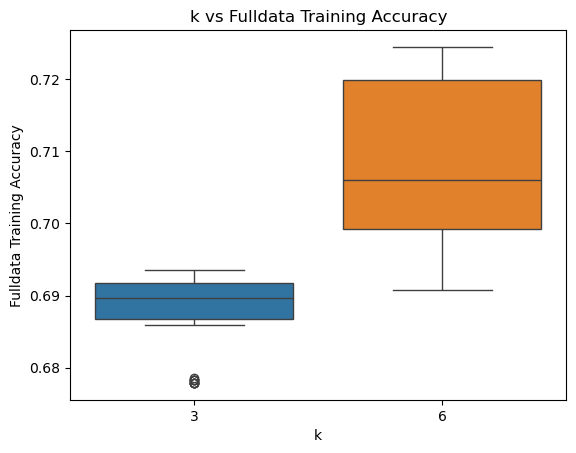

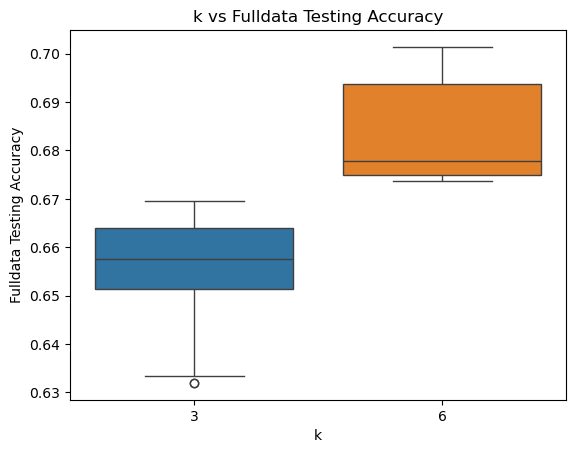

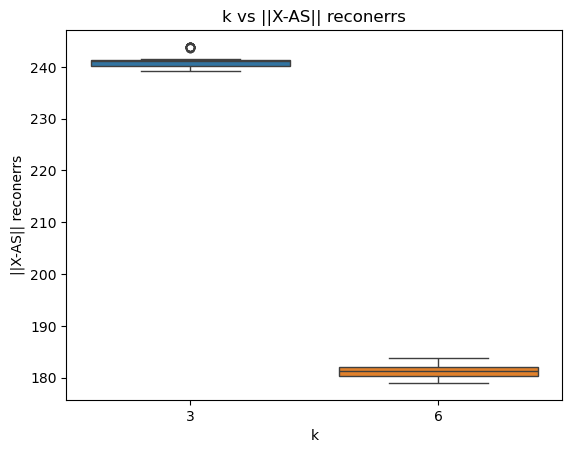

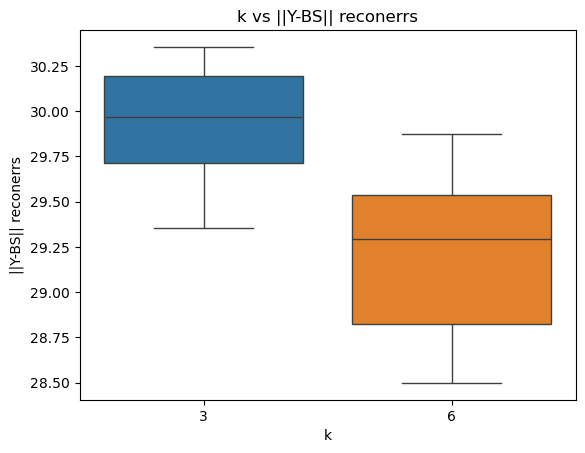

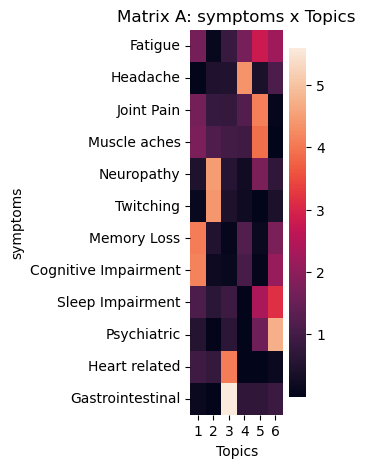

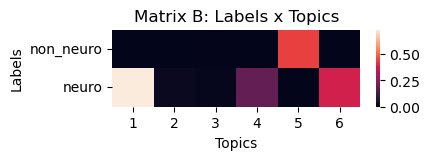

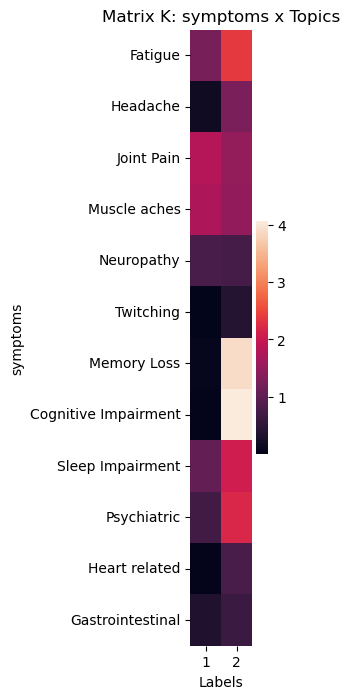

In [5]:
for k,v in train_results.items():
    if type(v) is not type(pd.DataFrame()):
        print(k,v)

# for k,v in test_results.items():
#     if type(v) is not type(pd.DataFrame()):
#         print(k,v)
        
train_accu_distr = train_results['train_accu_distr']
test_accu_distr = test_results['test_accu_distr']
Xreconerr_distr = reconerr_results['Xreconerr_distr']
Yreconerr_distr = reconerr_results['Yreconerr_distr']


display_distr(train_accu_distr, ylabel='Fulldata Training Accuracy')
display_distr(test_accu_distr, ylabel='Fulldata Testing Accuracy')

display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')

names = SYMPTOMS
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.fulldata_best_train_model

display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)
